In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

mouse_metadata_path ="data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_df = pd.merge(mouse_metadata,study_results, how="left", on='Mouse ID')
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
horde_size = mouse_df['Mouse ID'].unique()
horde_size.__len__()

249

In [3]:
mouse_df_clean = mouse_df.drop_duplicates(['Mouse ID'])
mouse_df_clean



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [4]:
mouse_count = mouse_df_clean['Mouse ID'].count()
mouse_count

249

In [5]:
tumor_mean_volume = mouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
tumor_median_volume = mouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
tumor_variance_volume = mouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
tumor_std_volume = mouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
tumor_sem_volume = mouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

In [6]:
drug_stats = pd.DataFrame({'Mean Tumor Volume': tumor_mean_volume,'Median Tumor Volume':tumor_median_volume,
               'Tumor Volume Variance':tumor_variance_volume,'Tumor Volume Std. Dev.':tumor_std_volume,
               'Tumor Volume Std. Err.':tumor_sem_volume})
drug_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


<Axes: xlabel='Drug Regimen'>

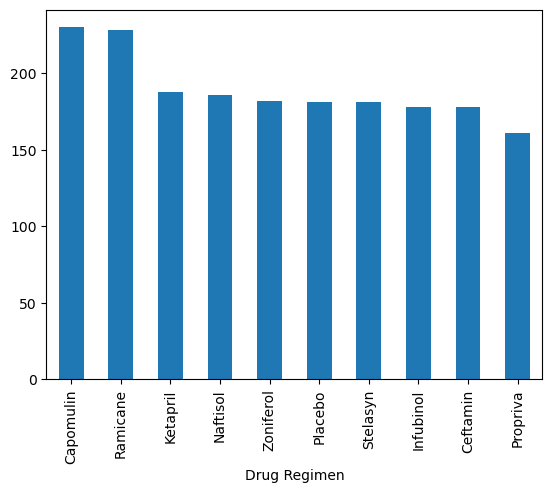

In [7]:
counts = mouse_df['Drug Regimen'].value_counts()
counts.plot(kind='bar')



In [ ]:
y_axis = np.array([counts])
x_axis = mouse_df['Drug Regimen'].value_counts()
plt.bar(counts,y_axis,color='b', align='center')
plt.xlabel("Drug Regimen")
plt.ylabel('# of Observed Mouse Timepoints')
plt.ylim(0,250)
plt.show()

Text(0, 0.5, 'Sex')

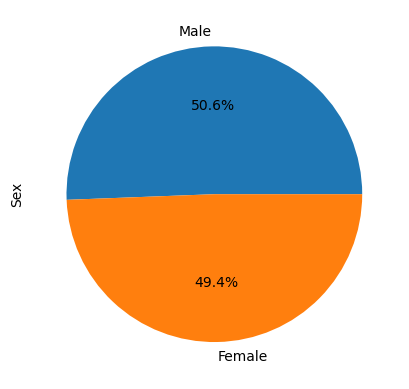

In [ ]:
mouse_sex = mouse_df['Sex'].value_counts()
mouse_pie = mouse_sex.plot(kind='pie',autopct='%1.1f%%', y='Sex',)
mouse_pie.set_ylabel("Sex")



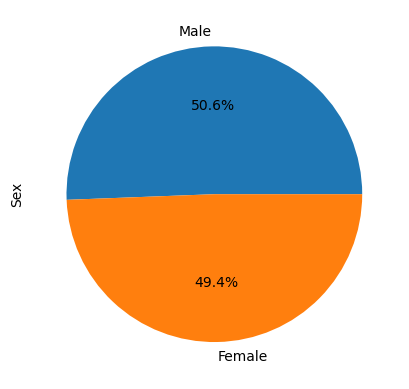

In [ ]:
sexs = ['Male','Female']
values = mouse_df['Sex'].value_counts()

plt.pie(values,autopct='%1.1f%%',labels=sexs)
plt.ylabel('Sex')
plt.show()




In [ ]:
terminal_time = mouse_df.groupby(["Mouse ID"])['Timepoint'].max()
terminal_size = mouse_df.groupby(['Mouse ID'])['Tumor Volume (mm3)'].last()

terminal_df = pd.DataFrame({'Terminal Timepoint': terminal_time, 'Terminal Tumor Volume (mm3)': terminal_size })
mouse_df_2 = pd.merge(mouse_df_clean,terminal_df,how='left', on="Mouse ID")
mouse_df_2 = mouse_df_2.drop(columns=['Timepoint', 'Metastatic Sites', 'Tumor Volume (mm3)'])
mouse_df_2.reset_index()
mouse_df_2.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Terminal Timepoint,Terminal Tumor Volume (mm3)
0,k403,Ramicane,Male,21,16,45,22.050126
1,s185,Capomulin,Female,3,17,45,23.343598
2,x401,Capomulin,Female,16,15,45,28.484033
3,m601,Capomulin,Male,22,17,45,28.430964
4,g791,Ramicane,Male,11,16,45,29.128472


In [ ]:
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume = []


for drug in treatment_list:
       
       final_tumor_vol = mouse_df_2.loc[mouse_df_2["Drug Regimen"] == drug, 'Terminal Tumor Volume (mm3)']
       
       quartiles = final_tumor_vol.quantile([.25,.5,.75])
       lowerq = quartiles[0.25]
       upperq = quartiles[0.75]
       iqr = upperq-lowerq
       lower_bound = lowerq - (1.5*iqr)
       upper_bound = upperq + (1.5*iqr)

       outlier_sizes =  final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
       print(outlier_sizes)
       tumor_volume.append(final_tumor_vol)

print(tumor_volume)


Series([], Name: Terminal Tumor Volume (mm3), dtype: float64)
Series([], Name: Terminal Tumor Volume (mm3), dtype: float64)
74    36.321346
Name: Terminal Tumor Volume (mm3), dtype: float64
Series([], Name: Terminal Tumor Volume (mm3), dtype: float64)
[1      23.343598
2      28.484033
3      28.430964
6      30.485985
10     31.023923
12     31.896238
13     32.377357
14     33.329098
16     34.455298
20     37.311846
22     36.041047
24     37.074024
28     38.846876
30     38.939633
31     38.982878
32     38.753265
34     38.125164
35     39.952347
36     40.658124
37     40.159220
38     40.728578
39     41.483008
40     41.581521
45     47.685963
181    46.539206
Name: Terminal Tumor Volume (mm3), dtype: float64, 0     22.050126
4     29.128472
5     30.276232
7     30.564625
8     30.638696
9     31.560470
11    31.095335
15    33.397653
17    32.978522
18    33.562402
19    36.134852
21    38.810366
23    37.225650
25    36.374510
26    36.561652
27    37.311236
29    38.342008

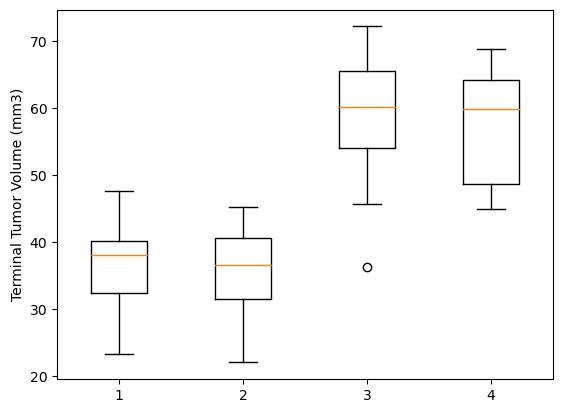

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Terminal Tumor Volume (mm3)')
ax1.boxplot(tumor_volume)
plt.show()

Text(0.5, 1.0, 'Capomulin treatment of mouse M601')

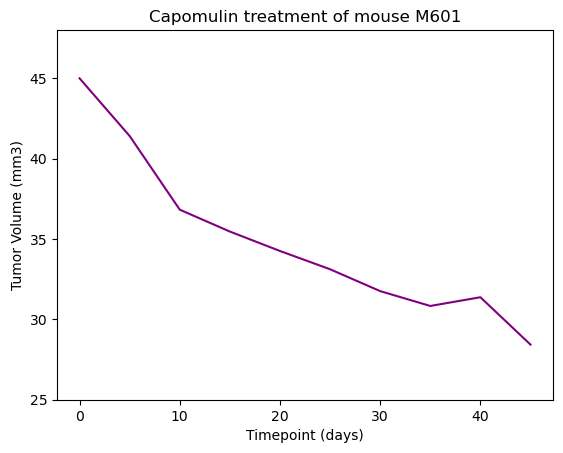

In [ ]:
# Was unable to locate a Mouse ID pertaining to 'I509', Mouse ID 'M601 was in place of 'I509'
# 'M601' was also treated with 'Capomulin'

mouse_m601 = mouse_df.loc[mouse_df['Mouse ID'] == 'm601', ['Timepoint','Tumor Volume (mm3)']]
timepoint = mouse_m601['Timepoint']
tumor_size = mouse_m601['Tumor Volume (mm3)']

plt.plot(timepoint,tumor_size, color='purple',)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.ylim(25,48)
plt.title('Capomulin treatment of mouse M601')





In [26]:
weight_class = mouse_df.groupby(['Mouse ID'])['Weight (g)'].()
weight_tumors = mouse_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
weight_class_df = pd.DataFrame({'Weight Class': weight_class,'Average Tumor Weight': weight_tumors})
weight_class_df


C:\Users\bdbag\AppData\Local\Temp\ipykernel_32712\3925225906.py:3: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  weight_class_df = pd.DataFrame({'Weight Class': weight_class,'Average Tumor Weight': weight_tumors})


,Weight Class,Average Tumor Weight
"(a203, 23)",10.0,NaN
"(a251, 25)",10.0,NaN
"(a262, 29)",10.0,NaN
"(a275, 28)",10.0,NaN
"(a366, 29)",7.0,NaN
...,...,...
z435,NaN,46.942214
z578,NaN,38.411510
z581,NaN,53.979584
z795,NaN,54.880317
